In [ ]:
# Importing Some Python Modules
import warnings; warnings.simplefilter('ignore')
import scipy, itertools, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

plt.style.use('bmh'); sns.set()

In [ ]:
dataset = pd.read_csv('datapegawai.csv')

In [ ]:
# Tipe Datanya : DataFrame (df)
print(type(dataset))
# Ukuran Data
N, P = dataset.shape
'baris = ', N, ', Kolom = ', P

<class 'pandas.core.frame.DataFrame'>


('baris = ', 23, ', Kolom = ', 5)

In [ ]:
# "Mengintip" beberapa data pertamanya
dataset.head(7)

,Kota,Umur,MasaKerja,Gaji,Bonus
0,Surabaya,27.0,9.0,51000.0,Yes
1,Jakarta,29.0,9.0,48000.0,Yes
2,Surabaya,30.0,5.0,52000.0,No
3,Jakarta,25.0,5.0,66000.0,No
4,Kediri,48.0,10.0,NaN,Yes
5,Kediri,33.0,8.0,51000.0,No
6,Malang,33.0,9.0,69000.0,No


In [ ]:
# "Mengintip" beberapa data akhirnya
dataset.tail(9)

,Kota,Umur,MasaKerja,Gaji,Bonus
14,Malang,37.0,6.0,49000.0,No
15,Malang,12.0,6.0,50000.0,No
16,Surabaya,40.0,11.0,69000.0,Yes
17,Jakarta,95.0,NaN,86000.0,NaN
18,Kediri,50.0,NaN,NaN,Yes
19,Surabaya,31.0,NaN,NaN,No
20,Surabaya,NaN,4.0,68000.0,Yes
21,Kediri,41.0,6.0,75000.0,Yes
22,Kediri,29.0,NaN,70000.0,No


In [ ]:
# chosen at random
dataset.sample(10)

,Kota,Umur,MasaKerja,Gaji,Bonus
12,Jakarta,NaN,12.0,79000.0,Yes
18,Kediri,50.0,NaN,NaN,Yes
5,Kediri,33.0,8.0,51000.0,No
13,Surabaya,31.0,NaN,85000.0,NaN
8,Surabaya,38.0,NaN,NaN,Yes
15,Malang,12.0,6.0,50000.0,No
22,Kediri,29.0,NaN,70000.0,No
3,Jakarta,25.0,5.0,66000.0,No
6,Malang,33.0,9.0,69000.0,No
10,Kediri,28.0,8.0,56000.0,No


In [ ]:
#cek missing value
dataset.isnull().sum()

Kota         0
Umur         2
MasaKerja    8
Gaji         4
Bonus        3
dtype: int64

In [ ]:
dataset[dataset.isnull().any(axis=1)]

,Kota,Umur,MasaKerja,Gaji,Bonus
4,Kediri,48.0,10.0,NaN,Yes
8,Surabaya,38.0,NaN,NaN,Yes
9,Malang,35.0,NaN,38000.0,NaN
11,Malang,35.0,NaN,72000.0,No
12,Jakarta,NaN,12.0,79000.0,Yes
13,Surabaya,31.0,NaN,85000.0,NaN
17,Jakarta,95.0,NaN,86000.0,NaN
18,Kediri,50.0,NaN,NaN,Yes
19,Surabaya,31.0,NaN,NaN,No
20,Surabaya,NaN,4.0,68000.0,Yes


In [ ]:
# perhatikan perintahnya tidak menggunakan tanda "()" ==> Properties
dataset.columns

Index(['Kota', 'Umur', 'MasaKerja', 'Gaji', 'Bonus'], dtype='object')

In [ ]:
# tipe data di setiap kolom
# Wajib di periksa apakah tipe datanya sudah tepat?
# Perhatikan df sebagaimana semua variable di Python diperlakukan seperti object
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Kota       23 non-null     object 
 1   Umur       21 non-null     float64
 2   MasaKerja  15 non-null     float64
 3   Gaji       19 non-null     float64
 4   Bonus      20 non-null     object 
dtypes: float64(3), object(2)
memory usage: 1.0+ KB


In [ ]:
# Merubah tipe data "jika" tidak tepat, contoh:
dataset.dtypes

Kota          object
Umur         float64
MasaKerja    float64
Gaji         float64
Bonus         object
dtype: object

In [ ]:
# dataframe types: https://pbpython.com/pandas_dtypes.html
dataset['Kota'] = dataset['Kota'].astype('category')
dataset['Bonus'] = dataset['Bonus'].astype('category')

In [ ]:
dataset.dtypes

Kota         category
Umur          float64
MasaKerja     float64
Gaji          float64
Bonus        category
dtype: object

In [ ]:
#mengecek apakah ada duplikat data?
print(dataset.shape)
dataset.duplicated().sum()

(23, 5)


0

In [ ]:
# Memilih hanya variable dengan tipe tertentu
dataset_num = dataset.select_dtypes(include = ['float64'])
dataset_num.head()

,Umur,MasaKerja,Gaji
0,27.0,9.0,51000.0
1,29.0,9.0,48000.0
2,30.0,5.0,52000.0
3,25.0,5.0,66000.0
4,48.0,10.0,NaN


In [ ]:
# Memilih hanya variable dengan tipe tertentu
dataset_cat = dataset.select_dtypes(include = ['category'])
dataset_cat.head()

,Kota,Bonus
0,Surabaya,Yes
1,Jakarta,Yes
2,Surabaya,No
3,Jakarta,No
4,Kediri,Yes


In [ ]:
#replace data yang diubah ke dataset
#fill atribut numeric dengan mean (rata-rata), atribut categorial dengan mode
dataset.fillna(dataset.select_dtypes(include='category').mode().iloc[0],inplace=True)
dataset.fillna(dataset.select_dtypes(include='number').mean().iloc[0],inplace=True)

In [ ]:
dataset

,Kota,Umur,MasaKerja,Gaji,Bonus
0,Surabaya,27.00000,9.00000,51000.00000,Yes
1,Jakarta,29.00000,9.00000,48000.00000,Yes
2,Surabaya,30.00000,5.00000,52000.00000,No
3,Jakarta,25.00000,5.00000,66000.00000,No
4,Kediri,48.00000,10.00000,36.52381,Yes
5,Kediri,33.00000,8.00000,51000.00000,No
6,Malang,33.00000,9.00000,69000.00000,No
7,Jakarta,40.00000,10.00000,79000.00000,Yes
8,Surabaya,38.00000,36.52381,36.52381,Yes
9,Malang,35.00000,36.52381,38000.00000,No


In [ ]:
dataset.isnull().sum()

Kota         0
Umur         0
MasaKerja    0
Gaji         0
Bonus        0
dtype: int64

In [ ]:
# Saving the preprocessed Data for future use/analysis
dataset2=dataset

In [ ]:
dataset2

,Kota,Umur,MasaKerja,Gaji,Bonus
0,Surabaya,27.00000,9.00000,51000.00000,Yes
1,Jakarta,29.00000,9.00000,48000.00000,Yes
2,Surabaya,30.00000,5.00000,52000.00000,No
3,Jakarta,25.00000,5.00000,66000.00000,No
4,Kediri,48.00000,10.00000,36.52381,Yes
5,Kediri,33.00000,8.00000,51000.00000,No
6,Malang,33.00000,9.00000,69000.00000,No
7,Jakarta,40.00000,10.00000,79000.00000,Yes
8,Surabaya,38.00000,36.52381,36.52381,Yes
9,Malang,35.00000,36.52381,38000.00000,No


In [ ]:
dataset2.describe()

,Umur,MasaKerja,Gaji
count,23.000000,23.000000,23.000000
mean,36.523810,17.834369,52745.482402
std,14.959397,14.088069,27811.891929
min,12.000000,4.000000,36.523810
25%,29.500000,7.000000,48500.000000
50%,35.000000,10.000000,56000.000000
75%,39.000000,36.523810,71000.000000
max,95.000000,36.523810,86000.000000


In [ ]:
# Statistika Sederhana dari data "Numerik"-nya
dataset2.describe(include='all')

,Kota,Umur,MasaKerja,Gaji,Bonus
count,23,23.000000,23.000000,23.000000,23
unique,4,NaN,NaN,NaN,2
top,Surabaya,NaN,NaN,NaN,No
freq,7,NaN,NaN,NaN,13
mean,NaN,36.523810,17.834369,52745.482402,NaN
std,NaN,14.959397,14.088069,27811.891929,NaN
min,NaN,12.000000,4.000000,36.523810,NaN
25%,NaN,29.500000,7.000000,48500.000000,NaN
50%,NaN,35.000000,10.000000,56000.000000,NaN
75%,NaN,39.000000,36.523810,71000.000000,NaN


Mendeteksi dan menghapus Outliner menggunakan Boxplot dan Percentile

In [ ]:
dataset2

,Kota,Umur,MasaKerja,Gaji,Bonus
0,Surabaya,27.00000,9.00000,51000.00000,Yes
1,Jakarta,29.00000,9.00000,48000.00000,Yes
2,Surabaya,30.00000,5.00000,52000.00000,No
3,Jakarta,25.00000,5.00000,66000.00000,No
4,Kediri,48.00000,10.00000,36.52381,Yes
5,Kediri,33.00000,8.00000,51000.00000,No
6,Malang,33.00000,9.00000,69000.00000,No
7,Jakarta,40.00000,10.00000,79000.00000,Yes
8,Surabaya,38.00000,36.52381,36.52381,Yes
9,Malang,35.00000,36.52381,38000.00000,No


In [ ]:
print(dataset2.describe())

            Umur  MasaKerja          Gaji
count  23.000000  23.000000     23.000000
mean   36.523810  17.834369  52745.482402
std    14.959397  14.088069  27811.891929
min    12.000000   4.000000     36.523810
25%    29.500000   7.000000  48500.000000
50%    35.000000  10.000000  56000.000000
75%    39.000000  36.523810  71000.000000
max    95.000000  36.523810  86000.000000


<function matplotlib.pyplot.show(close=None, block=None)>

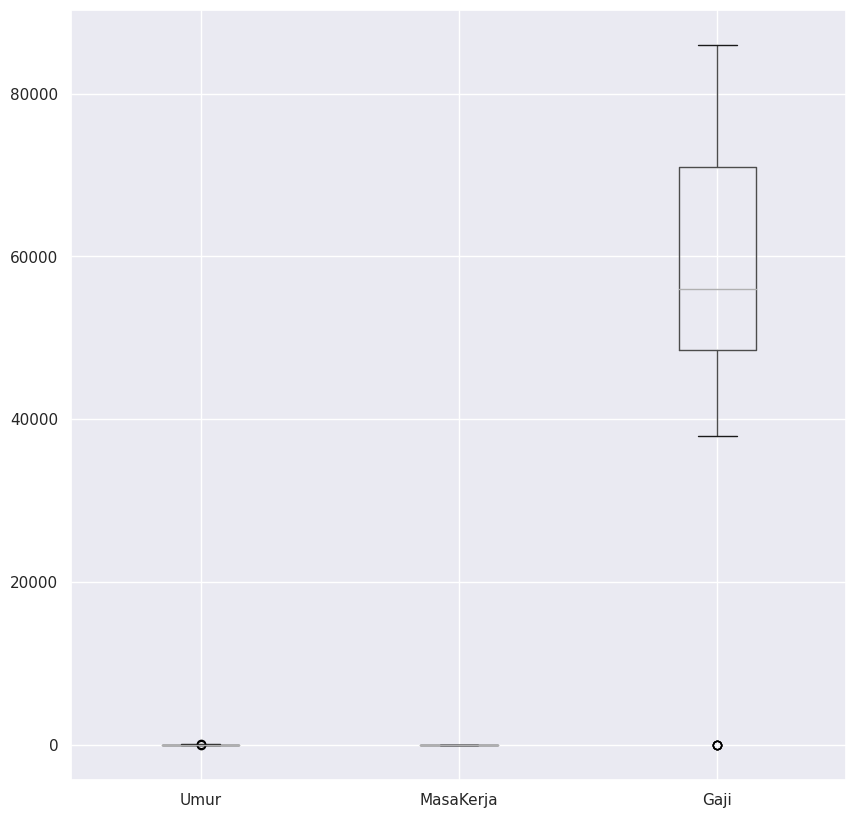

In [ ]:
#Find Outliner
plt.figure(figsize=(10,10))
dataset2.boxplot()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

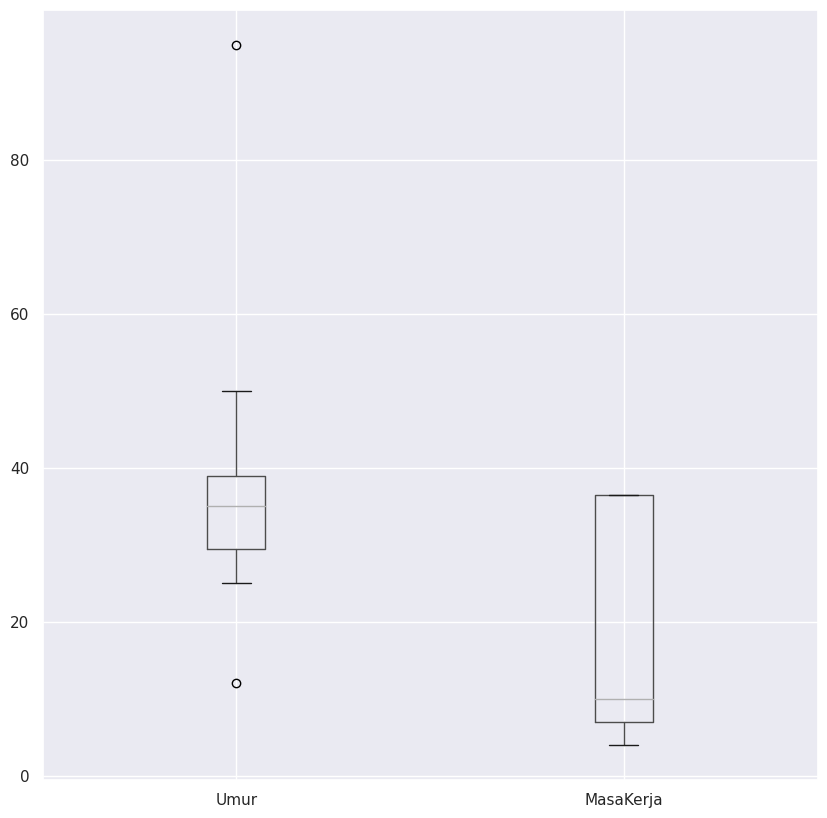

In [ ]:
#Find Outliner
plt.figure(figsize=(10,10))
dataset2.boxplot(column=['Umur','MasaKerja'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

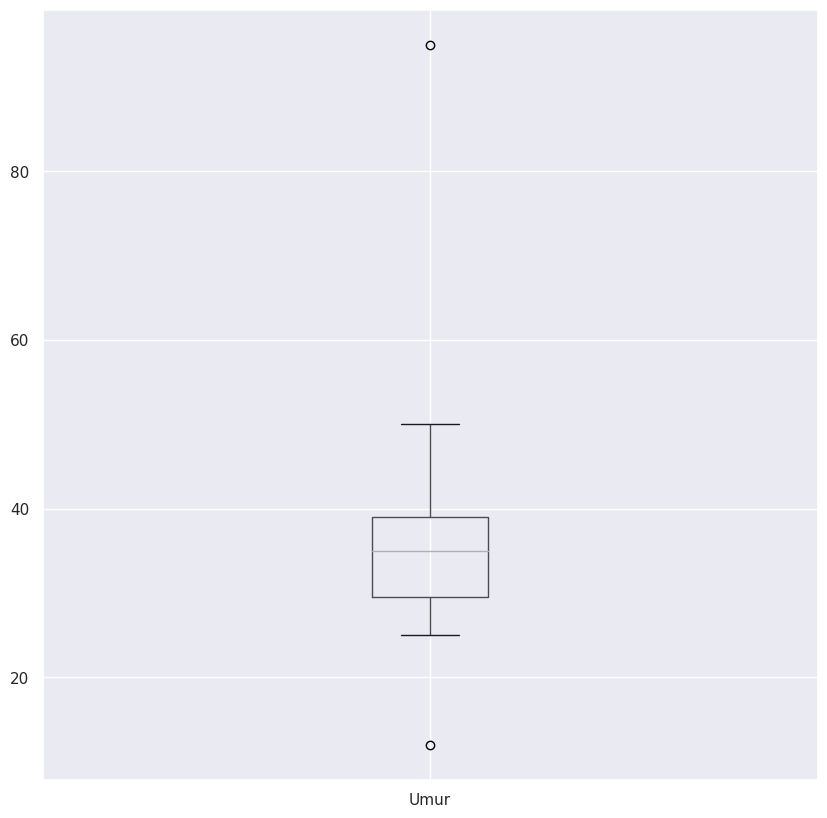

In [ ]:
#Find Outliner
plt.figure(figsize=(10,10))
dataset2.boxplot(column=['Umur'])
plt.show

In [ ]:
#membuat 5% batas bawah
lowwer_limit = dataset['Umur'].quantile(0.05)
lowwer_limit

25.2

In [ ]:
#menampilkan data dibawah lowwer limit
dataset[dataset['Umur']<lowwer_limit]

,Kota,Umur,MasaKerja,Gaji,Bonus
3,Jakarta,25.0,5.0,66000.0,No
15,Malang,12.0,6.0,50000.0,No


In [ ]:
#membuat batas watas 95%
upper_limit = dataset['Umur'].quantile(0.95)
upper_limit

49.8

In [ ]:
#menampilkan data diatas upper limit
dataset[dataset['Umur']>upper_limit]

,Kota,Umur,MasaKerja,Gaji,Bonus
17,Jakarta,95.0,36.52381,86000.00000,No
18,Kediri,50.0,36.52381,36.52381,Yes


In [ ]:
#Remove outlier
dataset[(dataset['Umur']>lowwer_limit) & (dataset['Umur']<upper_limit)]

,Kota,Umur,MasaKerja,Gaji,Bonus
0,Surabaya,27.00000,9.00000,51000.00000,Yes
1,Jakarta,29.00000,9.00000,48000.00000,Yes
2,Surabaya,30.00000,5.00000,52000.00000,No
4,Kediri,48.00000,10.00000,36.52381,Yes
5,Kediri,33.00000,8.00000,51000.00000,No
6,Malang,33.00000,9.00000,69000.00000,No
7,Jakarta,40.00000,10.00000,79000.00000,Yes
8,Surabaya,38.00000,36.52381,36.52381,Yes
9,Malang,35.00000,36.52381,38000.00000,No
10,Kediri,28.00000,8.00000,56000.00000,No


In [ ]:
#Remove outlier
dataset_no_outlier=dataset[(dataset['Umur']>lowwer_limit) & (dataset['Umur']<upper_limit)]

In [ ]:
dataset_no_outlier

,Kota,Umur,MasaKerja,Gaji,Bonus
0,Surabaya,27.00000,9.00000,51000.00000,Yes
1,Jakarta,29.00000,9.00000,48000.00000,Yes
2,Surabaya,30.00000,5.00000,52000.00000,No
4,Kediri,48.00000,10.00000,36.52381,Yes
5,Kediri,33.00000,8.00000,51000.00000,No
6,Malang,33.00000,9.00000,69000.00000,No
7,Jakarta,40.00000,10.00000,79000.00000,Yes
8,Surabaya,38.00000,36.52381,36.52381,Yes
9,Malang,35.00000,36.52381,38000.00000,No
10,Kediri,28.00000,8.00000,56000.00000,No


<function matplotlib.pyplot.show(close=None, block=None)>

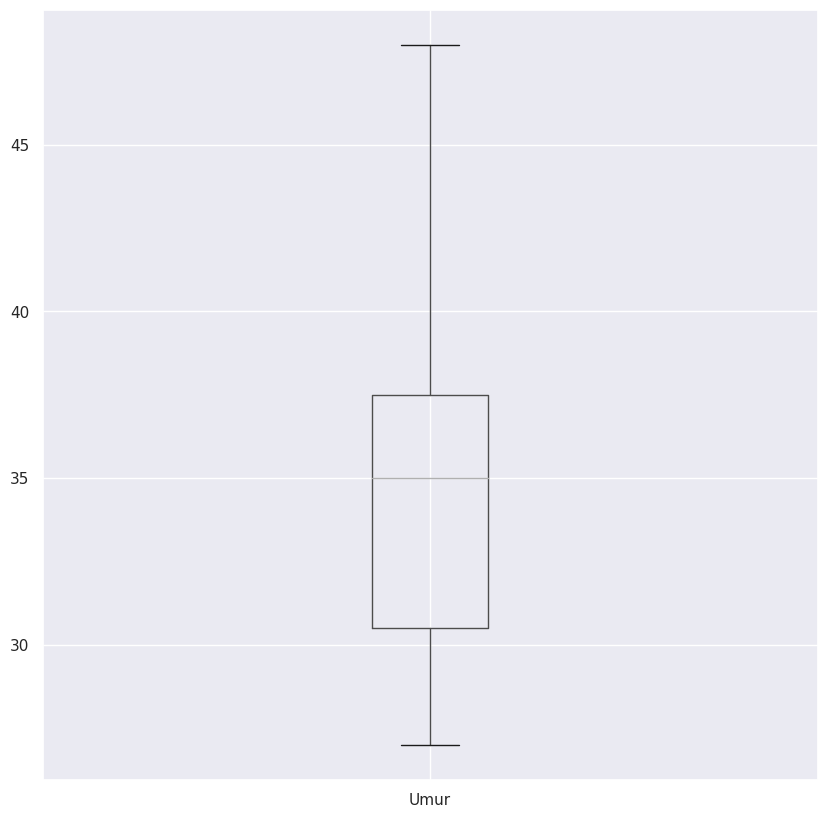

In [ ]:
#Find Outliner
plt.figure(figsize=(10,10))
dataset_no_outlier.boxplot(column=['Umur'])
plt.show

In [ ]:
#cek jumlah oulier yang terhapus
dataset.shape[0]-dataset_no_outlier.shape[0]

4

Creat(split) variabel bebas dan variabel terikat

In [ ]:
#creat independent & dependent variable vector
X=dataset2.iloc[:,:4].values
Y=dataset2.iloc[:,-1].values

In [ ]:
#menghapus beberapa kolom
dataset2.drop(["Kota", "Bonus"], axis=1)

,Umur,MasaKerja,Gaji
0,27.00000,9.00000,51000.00000
1,29.00000,9.00000,48000.00000
2,30.00000,5.00000,52000.00000
3,25.00000,5.00000,66000.00000
4,48.00000,10.00000,36.52381
5,33.00000,8.00000,51000.00000
6,33.00000,9.00000,69000.00000
7,40.00000,10.00000,79000.00000
8,38.00000,36.52381,36.52381
9,35.00000,36.52381,38000.00000
